# Cars with Lower than Average MSRP and Higher than Average City MPG

In [8]:
libname xl "&path\Cars With Lower than Average MSRP and Higher than Average City MPG\data\cars.xlsx";

%let outpath=&path\Cars With Lower than Average MSRP and Higher than Average City MPG;

23                                                         The SAS System                               11:40 Tuesday, July 13, 2021

159        ods listing close;ods html5 (id=saspy_internal) file=_tomods1 options(bitmap_mode='inline') device=svg style=HTMLBlue;
159      ! ods graphics on / outputfmt=png;
NOTE: Writing HTML5(SASPY_INTERNAL) Body file: _TOMODS1
160        
161        libname xl "&path\Cars With Lower than Average MSRP and Higher than Average City MPG\data\cars.xlsx";
NOTE: Libref XL was successfully assigned as follows: 
      Engine:        EXCEL 
      Physical Name: C:\Users\pestyl\OneDrive - SAS\github repos\Data Projects\Cars With Lower than Average MSRP and Higher than 
      Average City MPG\data\cars.xlsx
162        
163        %let outpath=&path\Cars With Lower than Average MSRP and Higher than Average City MPG;
164        
165        
166        ods html5 (id=saspy_internal) close;ods listing;
167        
24                                                  

In [9]:
proc print data=xl.cars(obs=10);
run;

Obs,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
1,Acura,MDX,SUV,Asia,All,36945,33337,3.5,6,265,17,23,4451,106,189
2,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820,21761,2.0,4,200,24,31,2778,101,172
3,Acura,TSX 4dr,Sedan,Asia,Front,26990,24647,2.4,4,200,22,29,3230,105,183
4,Acura,TL 4dr,Sedan,Asia,Front,33195,30299,3.2,6,270,20,28,3575,108,186
5,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755,39014,3.5,6,225,18,24,3880,115,197
6,Acura,3.5 RL w/Navigation 4dr,Sedan,Asia,Front,46100,41100,3.5,6,225,18,24,3893,115,197
7,Acura,NSX coupe 2dr manual S,Sports,Asia,Rear,89765,79978,3.2,6,290,17,24,3153,100,174
8,Audi,A4 1.8T 4dr,Sedan,Europe,Front,25940,23508,1.8,4,170,22,31,3252,104,179
9,Audi,A41.8T convertible 2dr,Sedan,Europe,Front,35940,32506,1.8,4,170,23,30,3638,105,180
10,Audi,A4 3.0 4dr,Sedan,Europe,Front,31840,28846,3.0,6,220,20,28,3462,104,179


In [10]:
*****************************;
* Create the CARS Table     *;
*****************************;
data cars;
    set xl.cars;
    if MPG_City > 20 and MSRP < 32775 then Car='High MPG, Low Cost';
        else Car='Low MPG, High Cost';
    keep MSRP MPG_City Car;
run;

proc print data=cars(obs=10) noobs;
run;

MSRP,MPG_City,Car
36945,17,"Low MPG, High Cost"
23820,24,"High MPG, Low Cost"
26990,22,"High MPG, Low Cost"
33195,20,"Low MPG, High Cost"
43755,18,"Low MPG, High Cost"
46100,18,"Low MPG, High Cost"
89765,17,"Low MPG, High Cost"
25940,22,"High MPG, Low Cost"
35940,23,"Low MPG, High Cost"
31840,20,"Low MPG, High Cost"


In [11]:
*******************************;
* Create the Annotation Table *;
*******************************;
%sganno
;

data mpgByCost;
    %sgLine(reset='all', X1=20, Y1=0, X2=20, Y2=32775, 
            DrawSpace='DataValue', LineColor='cx012036');
    %sgLine(reset='all', X1=20, Y1=32775, X2=100, Y2=32775, 
            DrawSpace='DataValue', X2Space='WallPercent', LineColor='cx012036');
    %sgText(reset='all', X1=40, Y1=39000, DrawSpace='DataValue', Label='MSRP $32,775', 
            Width=100, TextSize=12, TextColor='cx012036');
    %sgText(reset='all', X1=15, Y1=7000, DrawSpace='DataValue', Label='MPG City 20', 
            Width=100, TextSize=12, TextColor='cx012036');
run;

proc print data=mpgByCost noobs;
run;

DRAWSPACE,FUNCTION,LABEL,LINECOLOR,TEXTCOLOR,X2SPACE,TEXTSIZE,WIDTH,X1,X2,Y1,Y2
DataValue,LINE,,cx012036,,,.,.,20,20,0,32775
DataValue,LINE,,cx012036,,WallPercent,.,.,20,100,32775,32775
DataValue,TEXT,"MSRP $32,775",,cx012036,,12,100,40,.,39000,.
DataValue,TEXT,MPG City 20,,cx012036,,12,100,15,.,7000,.



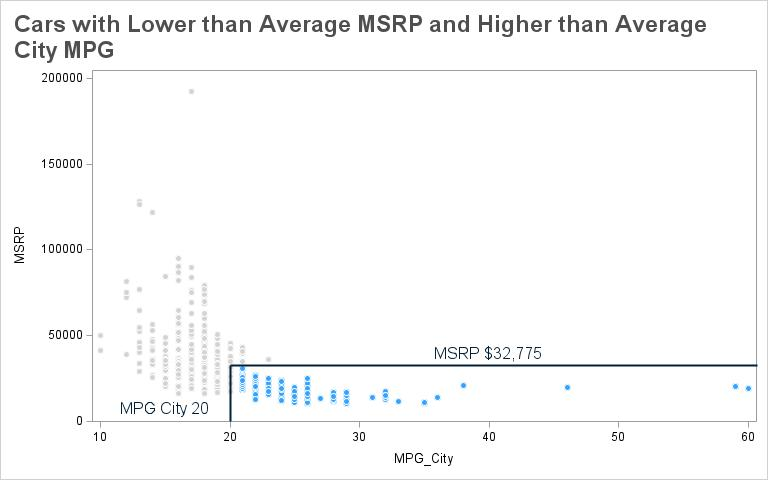

In [14]:
ods listing gpath="&outpath";
ods graphics / width=8in imagename="cars" imagefmt=jpeg;


title height=16pt justify=left color=charcoal 
      'Cars with Lower than Average MSRP and Higher than Average City MPG';
proc sgplot data=cars
            sganno=mpgByCost 
            noautolegend;
    scatter x=MPG_City y=MSRP
            / group=Car
              markerattrs=(symbol=CircleFilled)
              markeroutlineattrs=(color=white thickness=.5px)
              filledoutlinedmarkers;
    yaxis offsetmin=0;
    styleattrs datacolors=(LightGray cx33a3ff);
run;
title;